In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install scikit-plot
import scikitplot as skplot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score, fbeta_score, matthews_corrcoef, log_loss, make_scorer, balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, recall_score, precision_score, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV, learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
skplot.metrics.plot_confusion_matrix

<function scikitplot.metrics.plot_confusion_matrix(y_true, y_pred, labels=None, true_labels=None, pred_labels=None, title=None, normalize=False, hide_zeros=False, hide_counts=False, x_tick_rotation=0, ax=None, figsize=None, cmap='Blues', title_fontsize='large', text_fontsize='medium')>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance (1).csv


In [ ]:
df= pd.read_csv('predictive_maintenance.csv')

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
df.drop(['Product ID', 'UDI', 'Target'], axis = 1, inplace = True)


In [ ]:
# prompt: df

df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


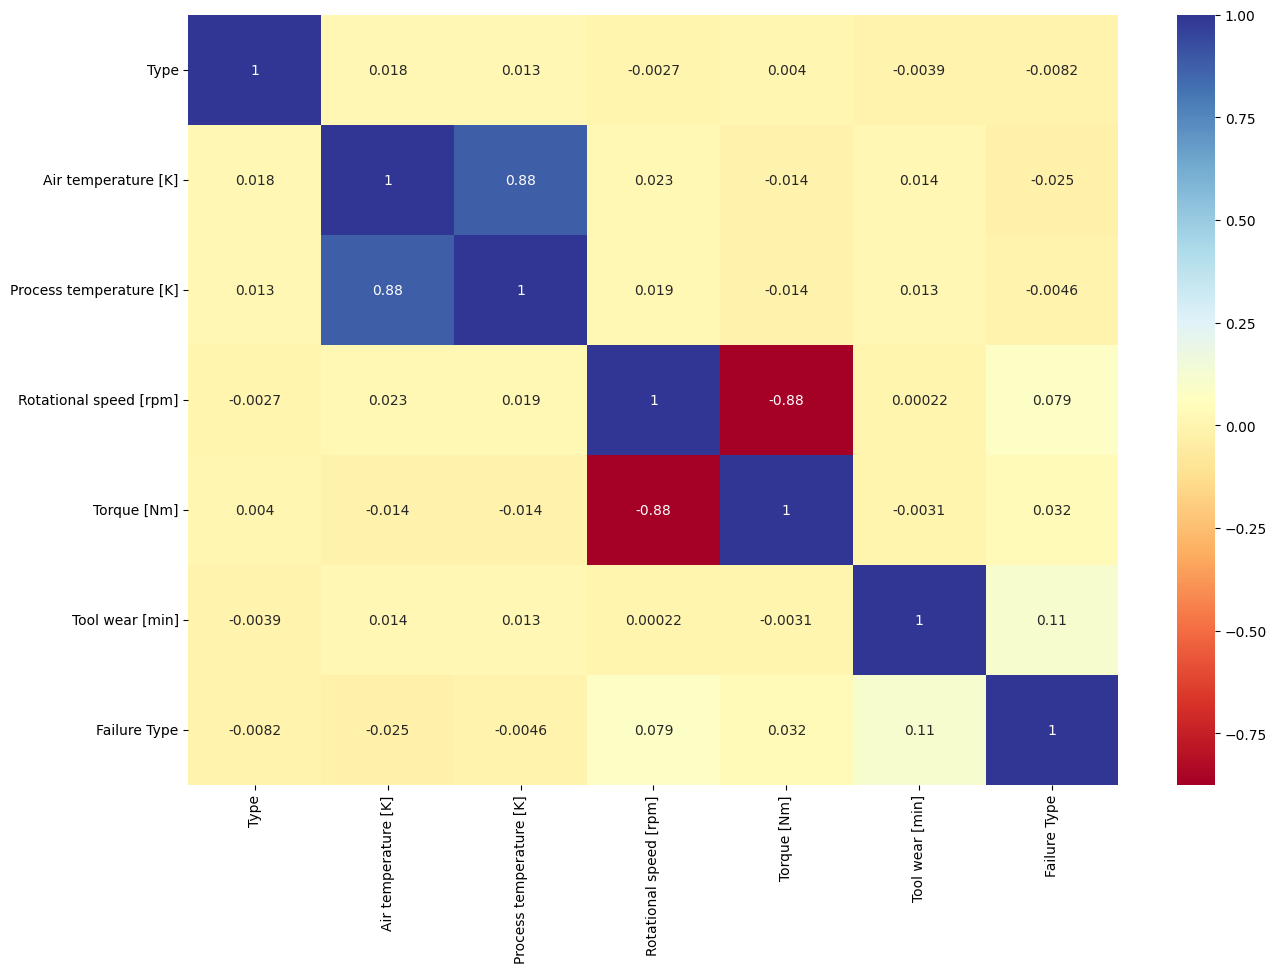

In [ ]:
# Encode the 'Failure Type' column using a label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Failure Type'] = le.fit_transform(df['Failure Type'])
df['Type'] = le.fit_transform(df['Type'])

# Now calculate the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.draw()


In [ ]:
df.isnull().values.any()

False

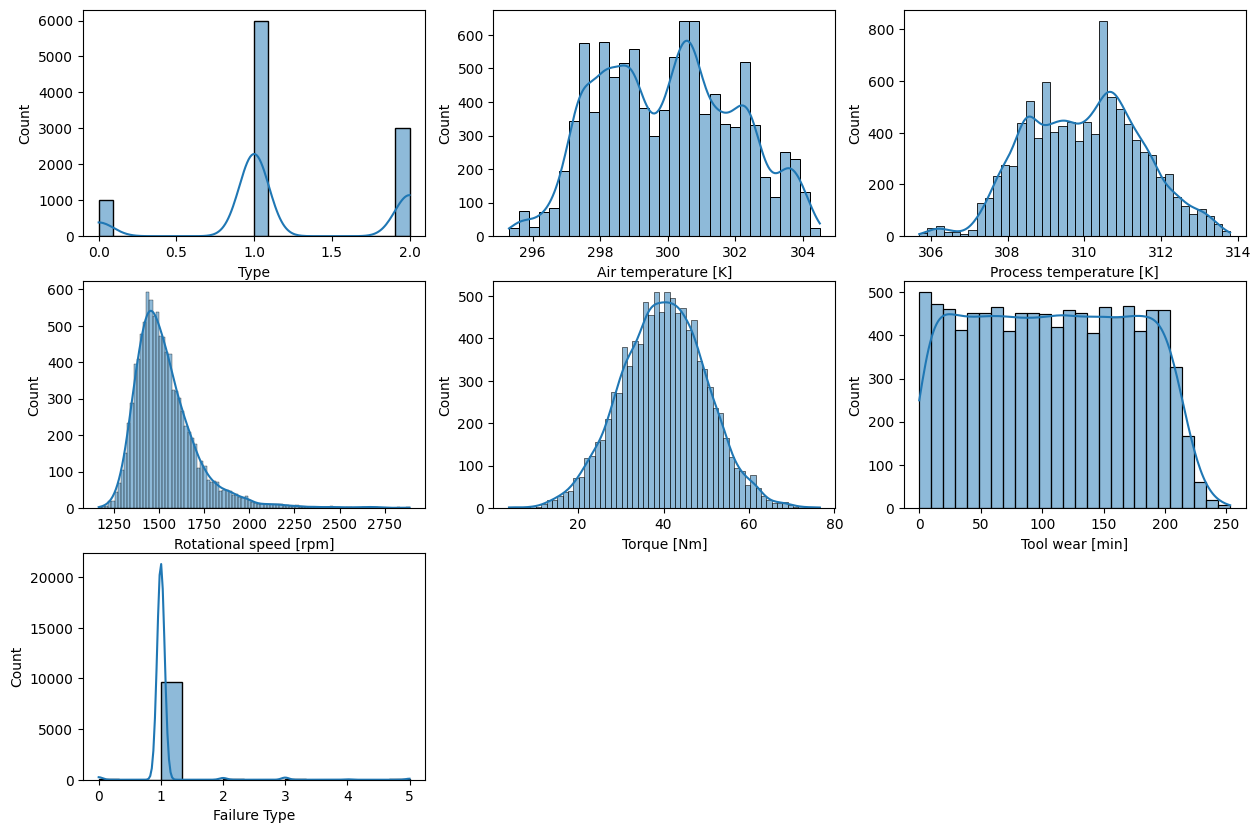

In [ ]:
plt.figure(figsize = (15,10))
for i, col in enumerate(df.columns,1):
  plt.subplot(3,3,i)
  sns.histplot(df[col],kde=True)


array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Failure Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

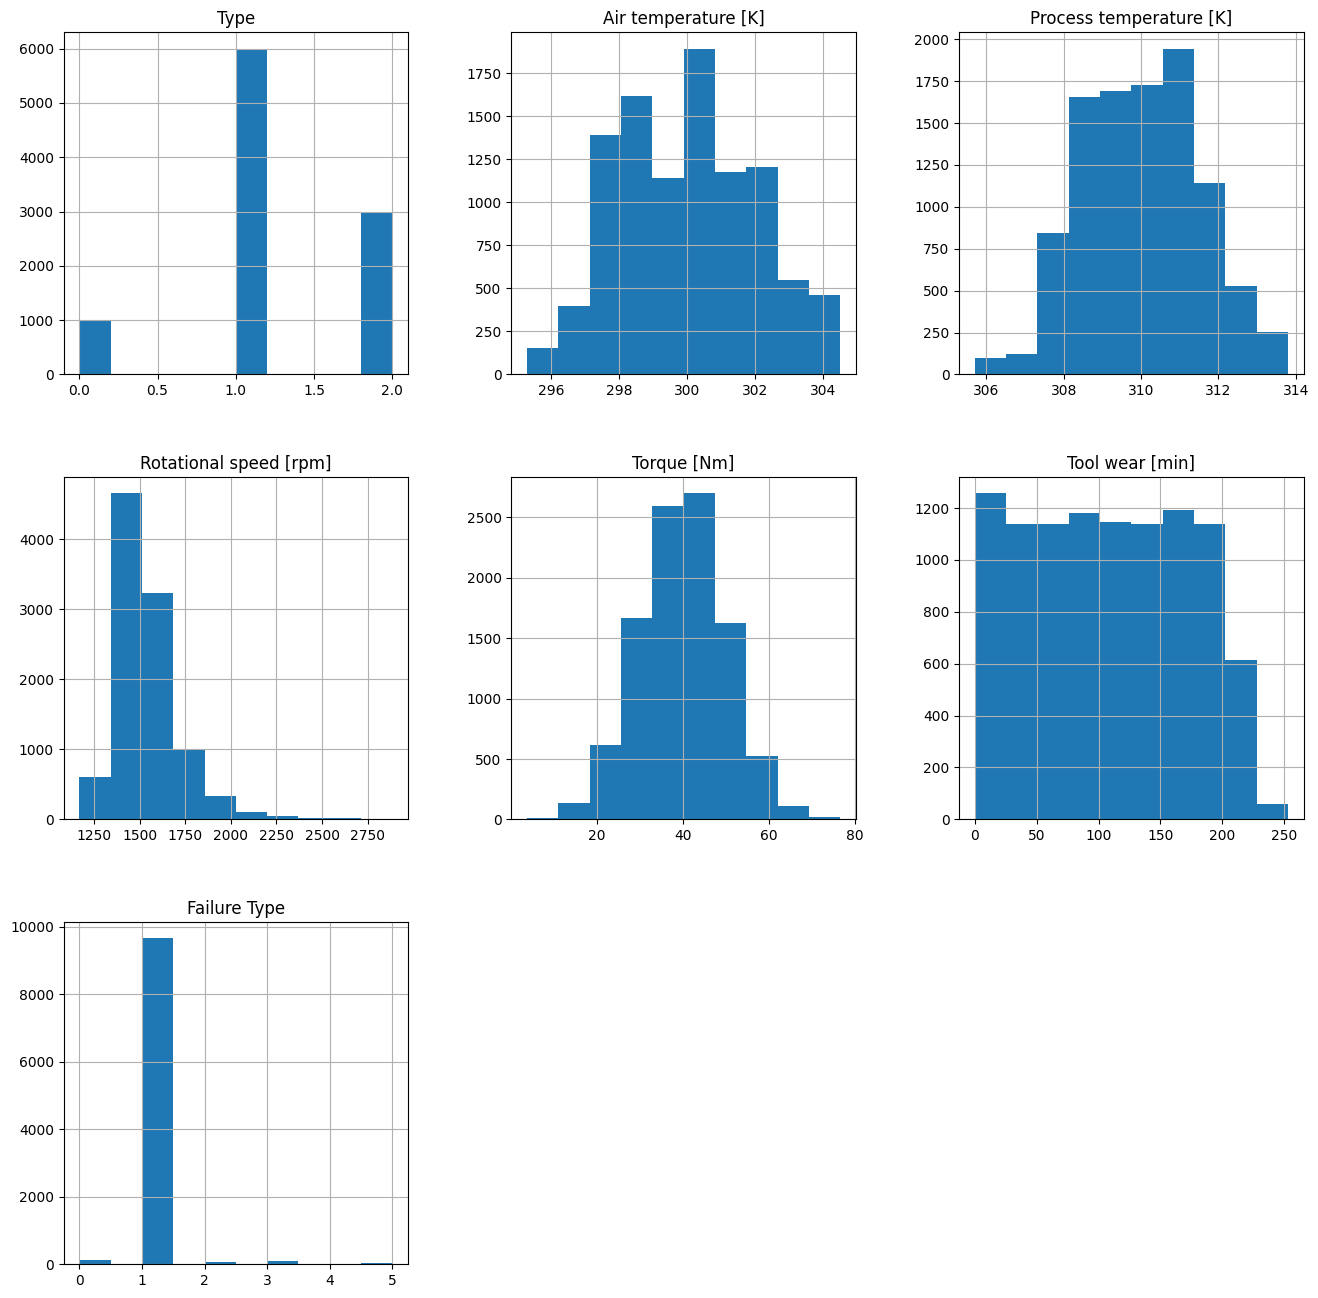

In [ ]:
df.hist(figsize = (16,16))

In [ ]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,1.039000
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.379069
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,1.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,1.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,1.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,5.000000


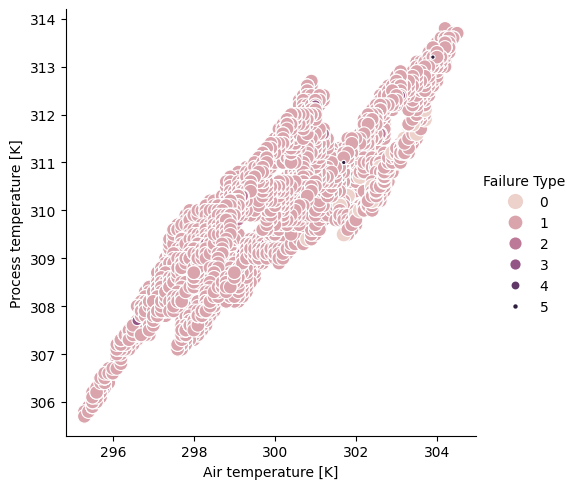

In [ ]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type", size="Failure Type", sizes=(120,10), data=df)

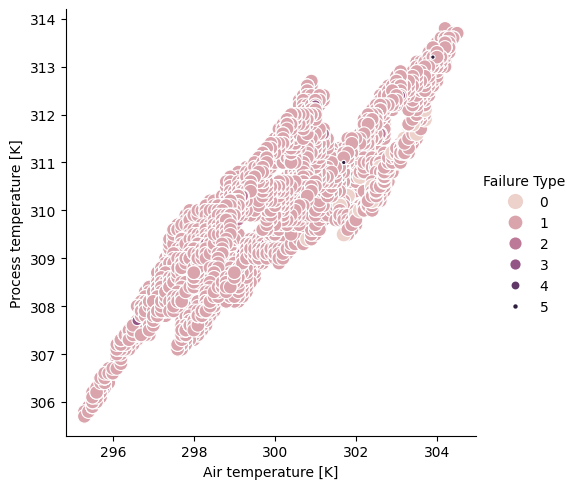

In [ ]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(120, 10), data=df)

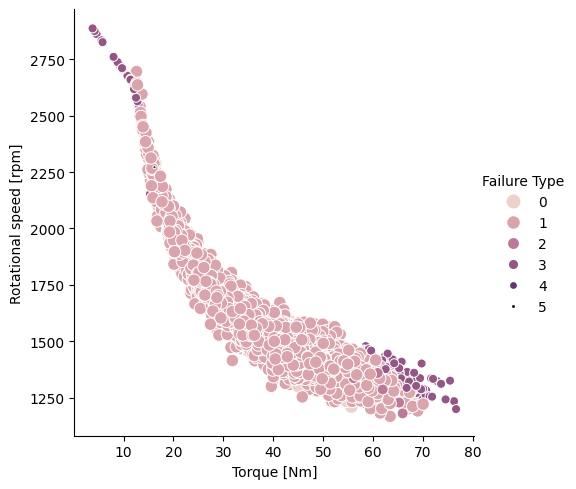

In [ ]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",size="Failure Type", sizes=(100, 5),data=df)

<ipython-input-65-52932503c48b>:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  _ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(10, 80), data=df, palette=[ "red","blue", "orange", "violet", "brown"])


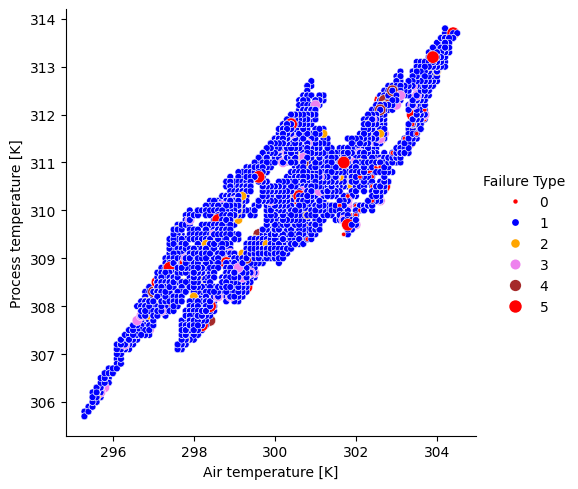

In [ ]:
# prompt: hue="Failure Type" how to get different colour pallete, i want  blue, red, orange, vilote, brown

_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(10, 80), data=df, palette=[ "red","blue", "orange", "violet", "brown"])


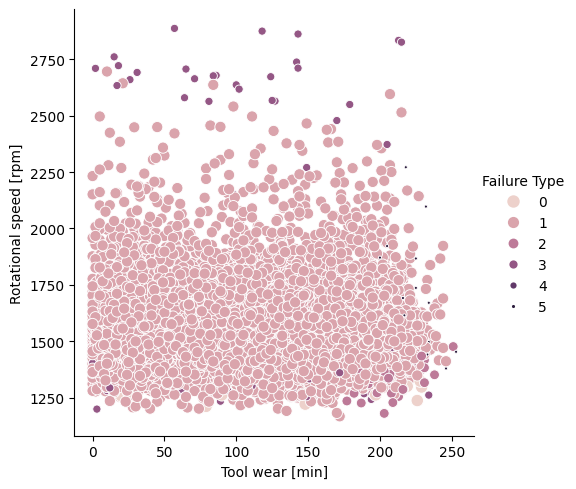

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)



In [ ]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure":2, "Power Failure":3, "Overstrain Failure":4,"Tool Wear Failure":5,"Random Failure":6})

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Failure Type, Length: 10000, dtype: int64

In [ ]:
df["Type"].replace({"H":0, "L":1, "M":2}, inplace = True)

In [ ]:
col_name = df.columns.to_list()

In [ ]:
predictive_columns = col_name[0:6]

In [ ]:
predictive_columns = col_name[0:6]
X = df[predictive_columns]
y = df["Failure Type"]



In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
skf = StratifiedGroupKFold(n_splits = 5, random_state = None)
for train_index, test_index in skf.split(X,y):
  x1_train , x1_test  = X.iloc[train_index], X.iloc[test_index]
  y1_train , y1_test  = y.iloc[train_index], y.iloc[test_index]
  train_0, train_1 = len(y1_train[y1_train == 0]), len(y1_train[y1_train == 1])
  test_0, test_1 = len(y1_test[y1_test == 0]), len(y1_test[y1_test == 1])
  print('train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

train: 0=112, 1=9651, Test: 0=0, 1=1
train: 0=112, 1=9652, Test: 0=0, 1=0
train: 0=112, 1=9652, Test: 0=0, 1=0
train: 0=112, 1=9652, Test: 0=0, 1=0
train: 0=112, 1=9652, Test: 0=0, 1=0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X1_res, y1_res = smote.fit_resample(X_train, y_train)

In [ ]:
X1_res.shape

(46272, 6)

In [ ]:
y1_res.shape


(46272,)

In [ ]:
df_x = pd.DataFrame(X1_res)

In [ ]:
df_x


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,300.400000,311.800000,1362,47.600000,188
1,2,299.700000,309.300000,1399,41.900000,221
2,2,301.800000,309.600000,1436,49.000000,214
3,1,300.400000,309.900000,1567,36.500000,72
4,2,298.100000,307.900000,1377,55.100000,42
...,...,...,...,...,...,...
46267,0,298.625943,308.870085,1555,36.904604,208
46268,1,299.010913,310.416369,1905,23.596428,222
46269,0,297.163461,307.989151,1550,35.941863,207
46270,1,301.917438,310.081672,1443,46.694571,235


In [ ]:
df_x["Type"].replace({0:"H", 1:"L", 2:"M"}, inplace = True)

In [ ]:
df_y = pd.DataFrame(y1_res)
df_y["Failure Type"].replace({0:"No Failure",1:"Heat Dissipation Failure",2:"Power Failure",3:"Overstrain Failure",4:"Tool Wear Failure",5:"Random Failures"},inplace=True)

In [ ]:
df1 = pd.concat([df_x,df_y], axis=1)


In [ ]:
df1['Failure Type'].value_counts()



Failure Type
Power Failure               7722
No Failure                  7716
Tool Wear Failure           7715
Overstrain Failure          7714
Random Failures             7713
Heat Dissipation Failure    7692
Name: count, dtype: int64

In [ ]:
# Check the first few rows of 'Failure Type' column to see if it contains any nested structures
print(df1['Failure Type'].head())

# If you find nested structures, you'll need to flatten them.
# The exact method for flattening depends on the nature of the nested data.
# For example, if it's a list of lists, you might use:
df1['Failure Type'] = df1['Failure Type'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Now try the value_counts() again
df1['Failure Type'].value_counts()

0    Heat Dissipation Failure
1             Random Failures
2    Heat Dissipation Failure
3    Heat Dissipation Failure
4    Heat Dissipation Failure
Name: Failure Type, dtype: object


Failure Type
Power Failure               7722
No Failure                  7716
Tool Wear Failure           7715
Overstrain Failure          7714
Random Failures             7713
Heat Dissipation Failure    7692
Name: count, dtype: int64

In [ ]:
# Check the first few rows of 'Failure Type' column to see if it contains any nested structures
print(df1['Failure Type'].head())

# If you find nested structures, you'll need to flatten them.
# The exact method for flattening depends on the nature of the nested data.
# For example, if it's a list of lists, you might use:
df1['Failure Type'] = df1['Failure Type'].apply(lambda x: x[0] if isinstance(x, list) else x)
#If it is a DataFrame, you can try: df1 = df1.explode('Failure Type')

# Now try the value_counts() again
df1['Failure Type'].value_counts()

0    Heat Dissipation Failure
1             Random Failures
2    Heat Dissipation Failure
3    Heat Dissipation Failure
4    Heat Dissipation Failure
Name: Failure Type, dtype: object


Failure Type
Power Failure               7722
No Failure                  7716
Tool Wear Failure           7715
Overstrain Failure          7714
Random Failures             7713
Heat Dissipation Failure    7692
Name: count, dtype: int64

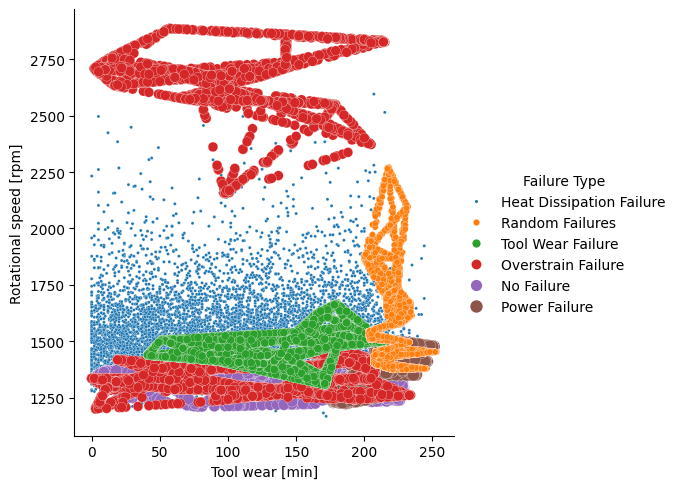

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df1)


In [ ]:
X_test.shape

(2000, 6)

In [ ]:
y_test.shape

(2000,)

In [ ]:
categorialcal_cols = X.select_dtypes(include ="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))


In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

to_log =["Rotational speed [rpm]", "Tool wear [min]"]
to_scale = ["Air temperature [K]", "Process temperature [K]", "Torque [Nm]"]
numeric_pipe_1 =make_pipeline(PowerTransformer()) # Now PowerTransformer is defined
numeric_pipe_2 = make_pipeline(StandardScaler())

In [ ]:
# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))

# Build numeric processor
to_log = ["Rotational speed [rpm]",	"Tool wear [min]"]
to_scale = ["Air temperature [K]","Process temperature [K]", "Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale)])


In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay


In [ ]:
rfc = OutputCodeClassifier(RandomForestClassifier(), code_size=6, random_state=40)

In [ ]:
pipeline = Pipeline(
    steps=[("preprocess", full),("base",rfc)])


              precision    recall  f1-score   support

           0       0.27      0.45      0.34        22
           1       0.98      0.95      0.96      1930
           2       0.55      0.75      0.63        16
           3       0.48      0.79      0.60        19
           4       0.00      0.00      0.00         4
           5       0.03      0.11      0.05         9

    accuracy                           0.93      2000
   macro avg       0.39      0.51      0.43      2000
weighted avg       0.96      0.93      0.95      2000



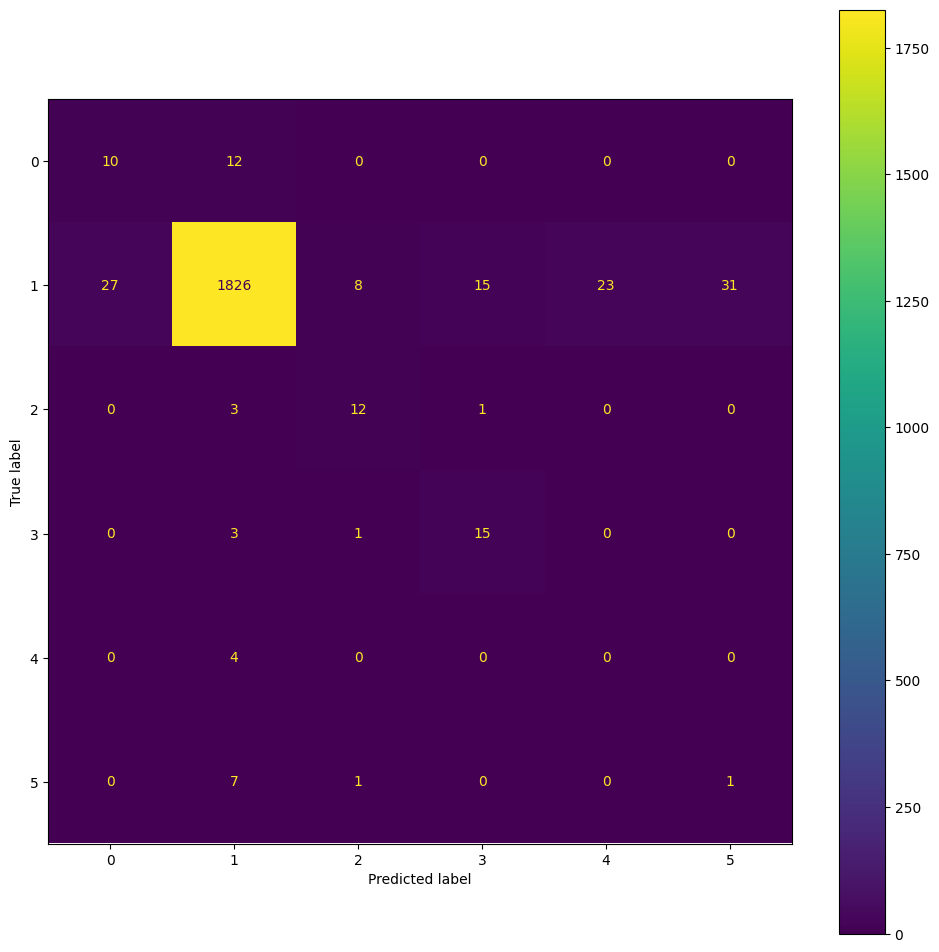

In [ ]:
model_rfc = pipeline.fit(X1_res, y1_res)
y_pred_rfc = model_rfc.predict(X_test)


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
print(classification_report(y_test, y_pred_rfc))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();

In [ ]:
print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.27      0.45      0.34        22
           1       0.98      0.95      0.96      1930
           2       0.55      0.75      0.63        16
           3       0.48      0.79      0.60        19
           4       0.00      0.00      0.00         4
           5       0.03      0.11      0.05         9

    accuracy                           0.93      2000
   macro avg       0.39      0.51      0.43      2000
weighted avg       0.96      0.93      0.95      2000



In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_rfc)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_rfc)))

Accuracy Score: 0.9320
Matthews correlation coefficient: 0.3739


In [ ]:
lgbm = OutputCodeClassifier(LGBMClassifier(), code_size=6, random_state=42)

In [ ]:
# Final pipeline combined with RandomForest
pipeline_lgbm = Pipeline(
    steps=[
        ("preprocess", full),
        ("base",lgbm,),])


In [ ]:
model_lgbm = pipeline_lgbm.fit(X1_res, y1_res)
y_pred_lgbm = model_lgbm.predict(X_test)


[LightGBM] [Info] Number of positive: 15438, number of negative: 30834
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 46272, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333636 -> initscore=-0.691786
[LightGBM] [Info] Start training from score -0.691786
[LightGBM] [Info] Number of positive: 38558, number of negative: 7714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 46272, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833290 -> initscore=1.609127
[LightGBM] [Info] Start training from score 1.609127
[LightGBM] [Info] N

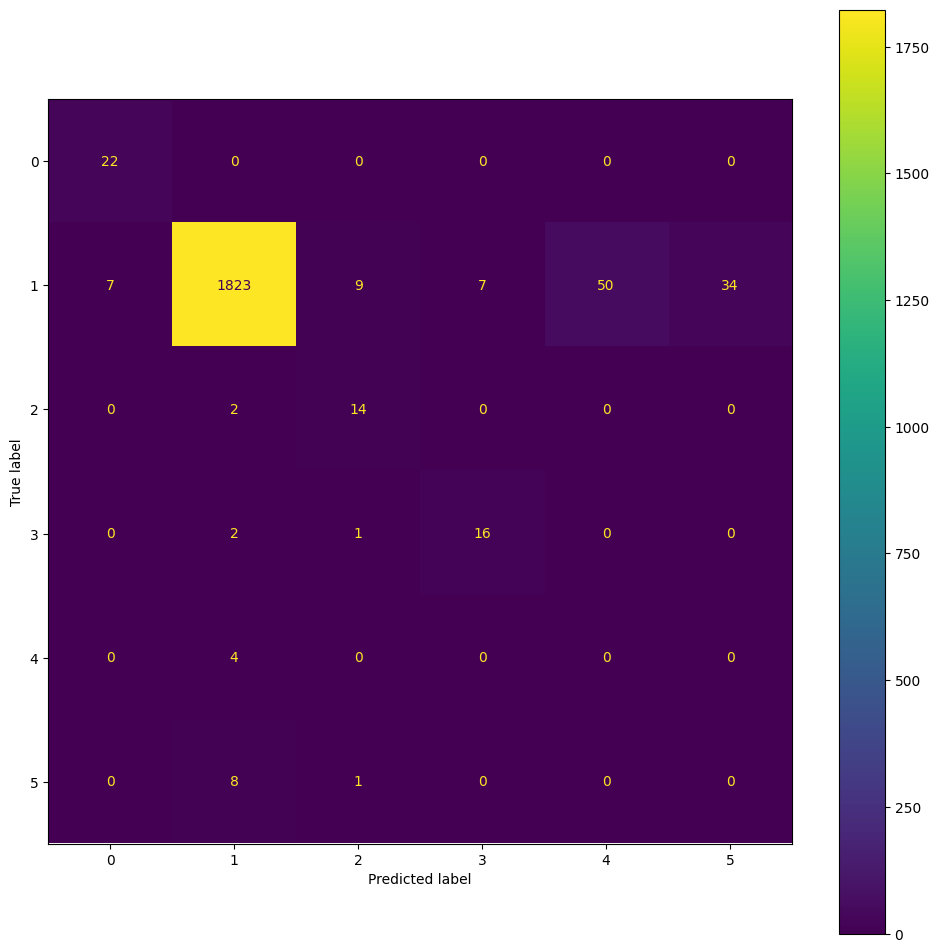

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        22
           1       0.99      0.94      0.97      1930
           2       0.56      0.88      0.68        16
           3       0.70      0.84      0.76        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.94      2000
   macro avg       0.50      0.61      0.55      2000
weighted avg       0.98      0.94      0.96      2000



In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_lgbm))

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_lgbm)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_lgbm)))


Accuracy Score: 0.9375
Matthews correlation coefficient: 0.4853


In [ ]:
from xgboost import XGBClassifier

In [ ]:

xgb = OutputCodeClassifier(XGBClassifier(), code_size=6, random_state=42)


In [ ]:
pipeline_xgb = Pipeline(
    steps=[("preprocess", full),("base",xgb)])

In [ ]:
model_xgb = pipeline_xgb.fit(X1_res, y1_res)
y_pred_xgb = model_xgb.predict(X_test)


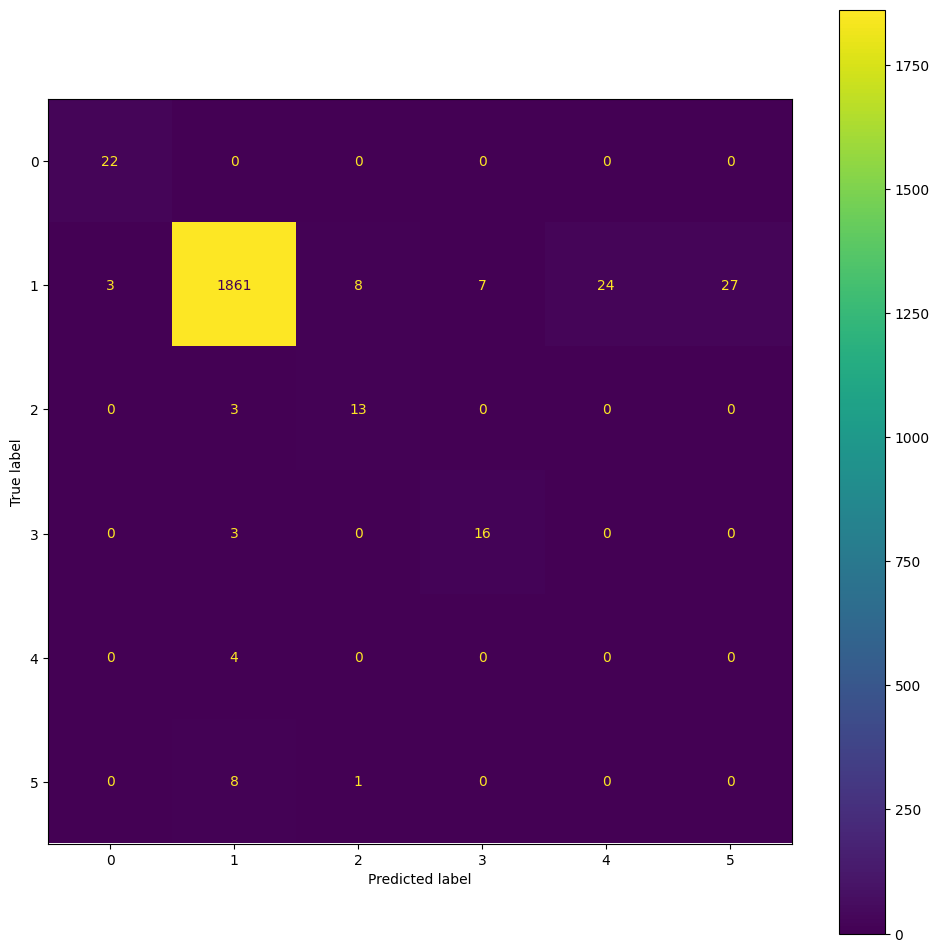

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       0.99      0.96      0.98      1930
           2       0.59      0.81      0.68        16
           3       0.70      0.84      0.76        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.53      0.60      0.56      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_xgb))


In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_lgbm)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_lgbm)))


Accuracy Score: 0.9375
Matthews correlation coefficient: 0.4853


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool, cv


In [ ]:
catb = OutputCodeClassifier(CatBoostClassifier(random_seed=42,logging_level='Silent'), code_size=6, random_state=42)


In [ ]:
pipeline_catb = Pipeline(steps=[("preprocess", full),("base",catb)])



In [ ]:
model_catb = catb.fit(X1_res, y1_res)
y_pred_catb = model_catb.predict(X_test)


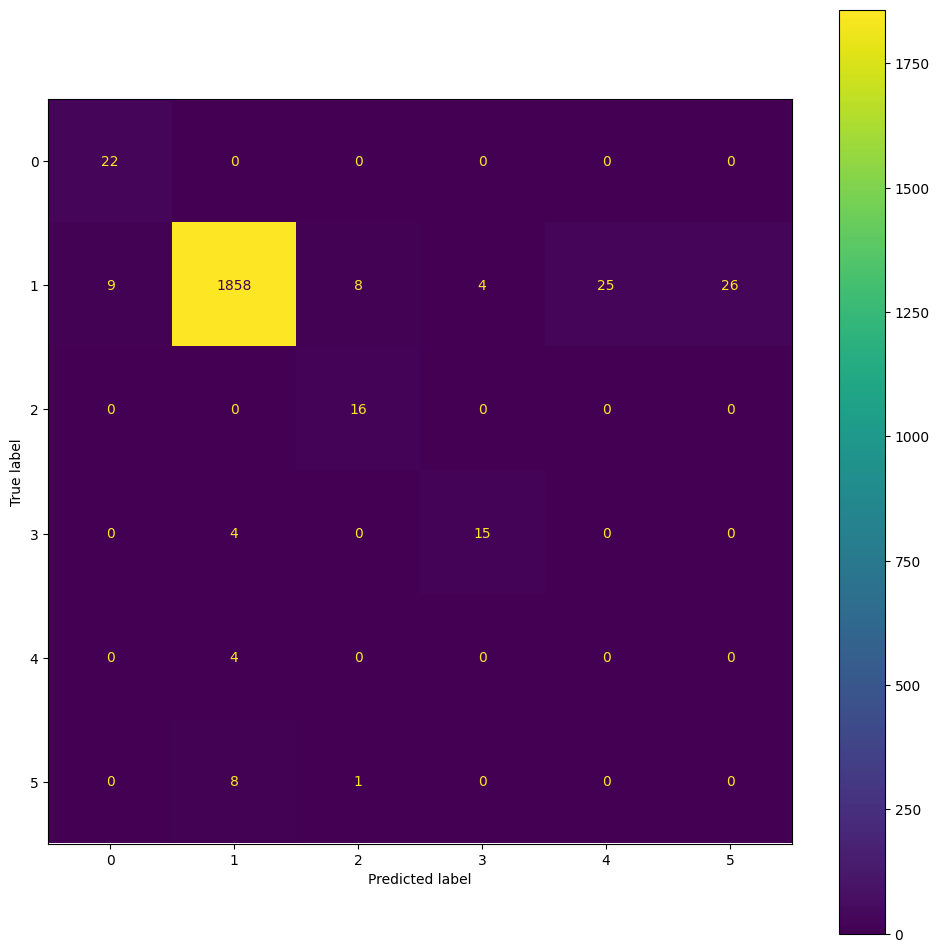

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        22
           1       0.99      0.96      0.98      1930
           2       0.64      1.00      0.78        16
           3       0.79      0.79      0.79        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.52      0.63      0.56      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_catb)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_catb))


In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_catb)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_catb)))


Accuracy Score: 0.9555
Matthews correlation coefficient: 0.5581


In [ ]:
catb_ov = CatBoostClassifier()
ovr = OneVsRestClassifier(catb_ov)


In [ ]:
!pip install scikit-learn
from sklearn.multiclass import OneVsRestClassifier

catb_ov = CatBoostClassifier()
ovr = OneVsRestClassifier(catb_ov) # OneVsRestClassifier is now available

In [ ]:
ovr.fit(X1_res, y1_res)
yhat_ovr = ovr.predict(X_test)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.4473747	total: 161ms	remaining: 32.1s
5:	learn: 0.4197114	total: 192ms	remaining: 31.8s
6:	learn: 0.3914287	total: 225ms	remaining: 31.9s
7:	learn: 0.3701941	total: 254ms	remaining: 31.5s
8:	learn: 0.3513363	total: 288ms	remaining: 31.7s
9:	learn: 0.3318889	total: 320ms	remaining: 31.7s
10:	learn: 0.3174972	total: 349ms	remaining: 31.4s
11:	learn: 0.3030856	total: 379ms	remaining: 31.2s
12:	learn: 0.2914682	total: 411ms	remaining: 31.2s
13:	learn: 0.2819103	total: 442ms	remaining: 31.1s
14:	learn: 0.2737156	total: 473ms	remaining: 31.1s
15:	learn: 0.2656661	total: 508ms	remaining: 31.3s
16:	learn: 0.2565985	total: 527ms	remaining: 30.5s
17:	learn: 0.2500922	total: 538ms	remaining: 29.4s
18:	learn: 0.2436485	total: 550ms	remaining: 28.4s
19:	learn: 0.2369509	total: 563ms	remaining: 27.6s
20:	learn: 0.2310478	total: 575ms	remaining: 26.8s
21:	learn: 0.2267692	total: 587ms	remaining: 26.1s
22:	learn: 0.2221535	total: 598ms	rem

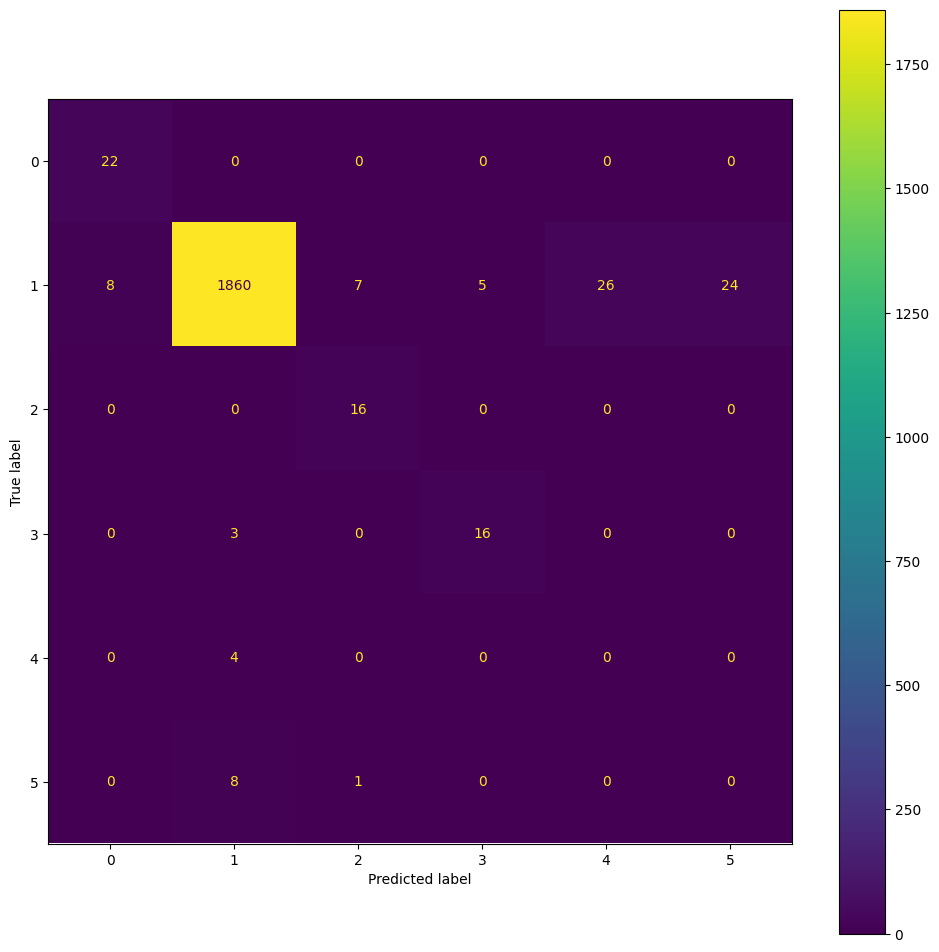

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.99      0.96      0.98      1930
           2       0.67      1.00      0.80        16
           3       0.76      0.84      0.80        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.53      0.63      0.57      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
pipeline = Pipeline(
    steps=[("preprocess", full),("base",ovr)])


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovr))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovr)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovr)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovr)))


Balanced Accuracy Score: 0.6343
Accuracy Score: 0.9570
Matthews correlation coefficient: 0.5715


In [ ]:
catb_ov = CatBoostClassifier()
ovr = OneVsRestClassifier(catb_ov)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.2790361	total: 29.8ms	remaining: 5.92s
5:	learn: 0.2314469	total: 35.6ms	remaining: 5.9s
6:	learn: 0.1933859	total: 42.8ms	remaining: 6.07s
7:	learn: 0.1626814	total: 57.9ms	remaining: 7.18s
8:	learn: 0.1375505	total: 70ms	remaining: 7.71s
9:	learn: 0.1150614	total: 78.5ms	remaining: 7.78s
10:	learn: 0.0960634	total: 84.4ms	remaining: 7.58s
11:	learn: 0.0801620	total: 89.7ms	remaining: 7.38s
12:	learn: 0.0683397	total: 95.3ms	remaining: 7.24s
13:	learn: 0.0580362	total: 101ms	remaining: 7.12s
14:	learn: 0.0492865	total: 107ms	remaining: 7.01s
15:	learn: 0.0425654	total: 112ms	remaining: 6.9s
16:	learn: 0.0367911	total: 118ms	remaining: 6.81s
17:	learn: 0.0315925	total: 123ms	remaining: 6.73s
18:	learn: 0.0274261	total: 130ms	remaining: 6.71s
19:	learn: 0.0239831	total: 137ms	remaining: 6.69s
20:	learn: 0.0208043	total: 143ms	remaining: 6.64s
21:	learn: 0.0183441	total: 148ms	remaining: 6.6s
22:	learn: 0.0160920	total: 154ms

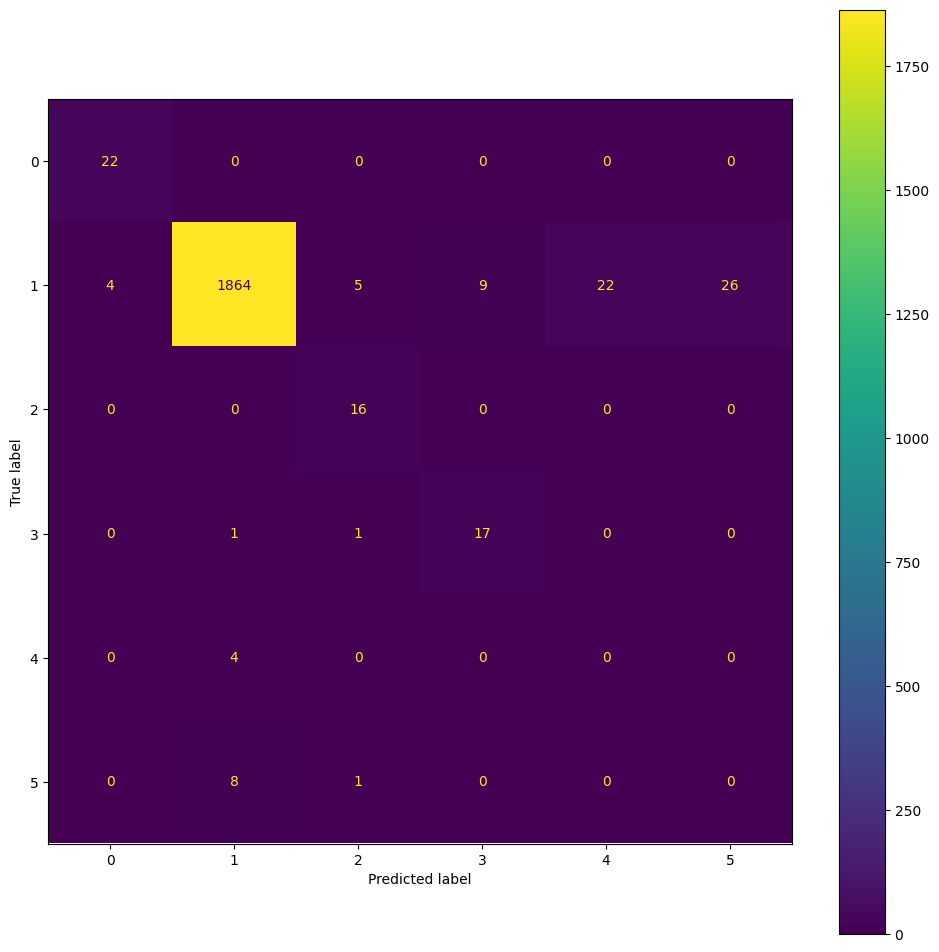

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       0.99      0.97      0.98      1930
           2       0.70      1.00      0.82        16
           3       0.65      0.89      0.76        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.53      0.64      0.58      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
!pip install scikit-learn
from sklearn.multiclass import OneVsOneClassifier
from catboost import CatBoostClassifier
catb_ovo = CatBoostClassifier()
ovo = OneVsOneClassifier(catb_ovo)


ovo.fit(X1_res, y1_res)
yhat_ovo = ovo.predict(X_test)


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovo))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovo)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovo)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovo)))


Balanced Accuracy Score: 0.6434
Accuracy Score: 0.9595
Matthews correlation coefficient: 0.5930


In [ ]:
rfc_ov = RandomForestClassifier()


ovr = OneVsRestClassifier(rfc_ov)
ovr.fit(X1_res, y1_res)


OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
OneVsRestClassifier(estimator=RandomForestClassifier())

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
yhat_ovr = ovr.predict(X_test)


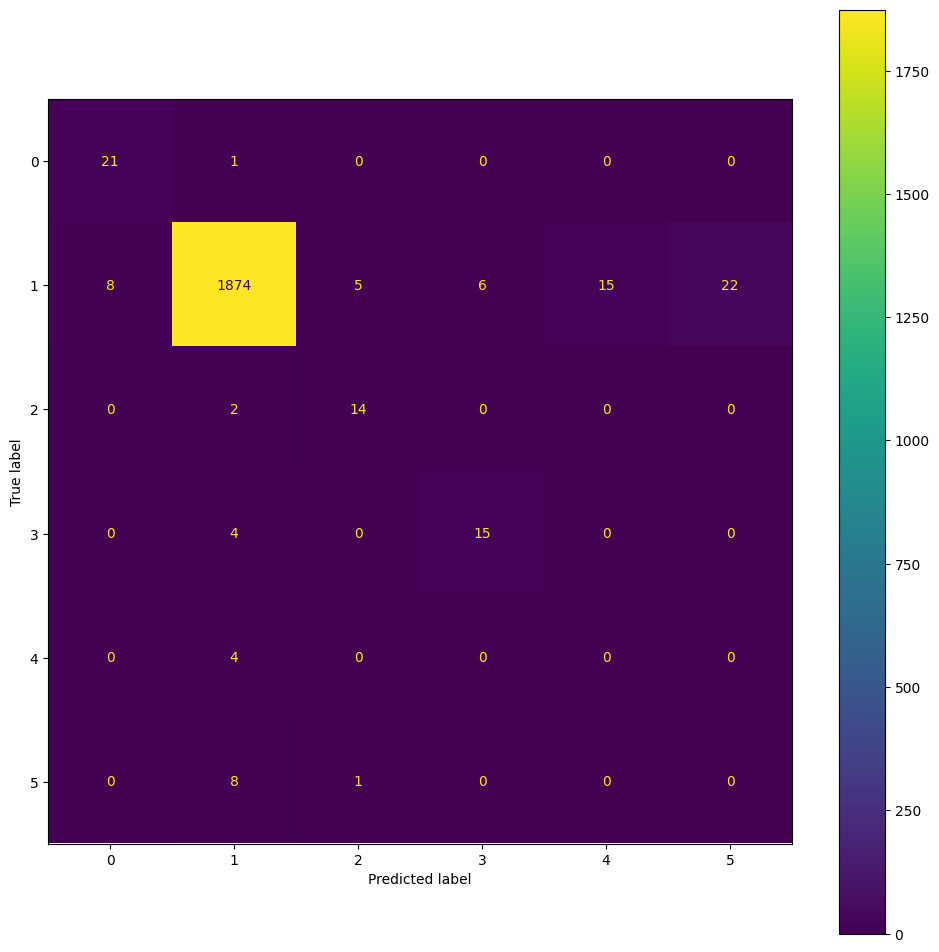

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.99      0.97      0.98      1930
           2       0.70      0.88      0.78        16
           3       0.71      0.79      0.75        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.52      0.60      0.56      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovr))


In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovr)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovr)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovr)))


Balanced Accuracy Score: 0.5983
Accuracy Score: 0.9620
Matthews correlation coefficient: 0.5727


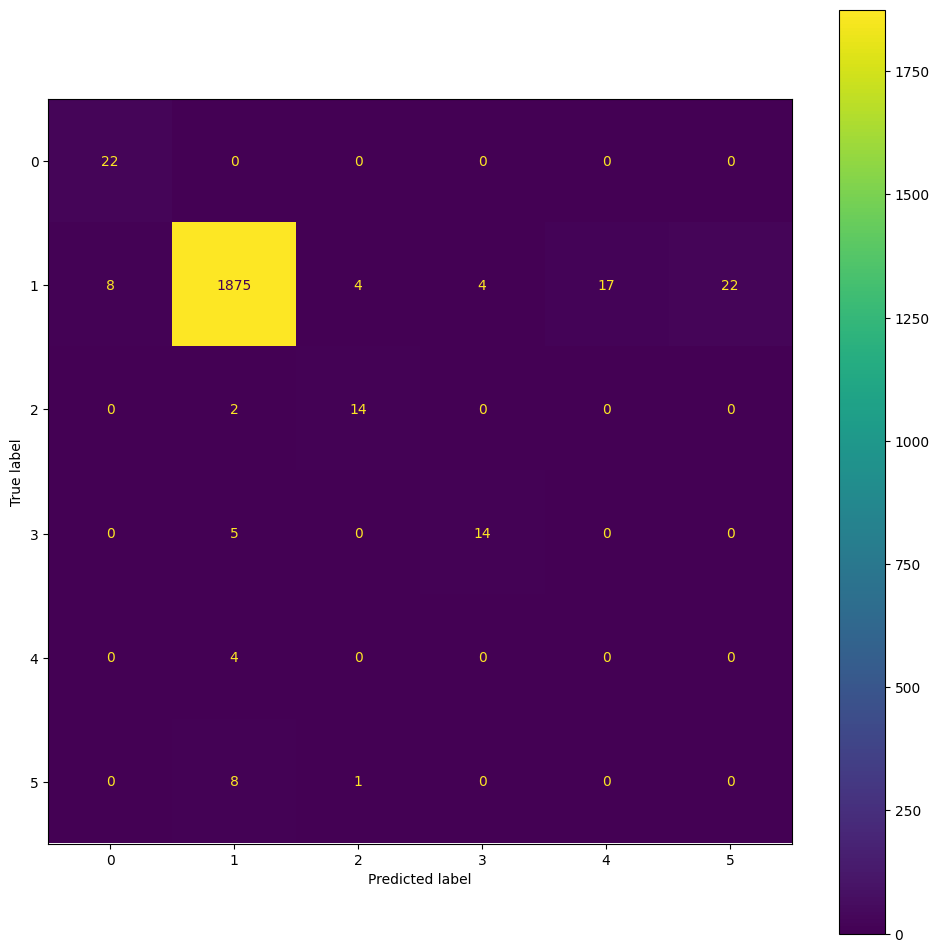

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.99      0.97      0.98      1930
           2       0.74      0.88      0.80        16
           3       0.78      0.74      0.76        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.54      0.60      0.56      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
ovo = OneVsOneClassifier(rfc_ov)


ovo.fit(X1_res, y1_res)
yhat_ovo = ovo.predict(X_test)


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovo))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovo)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovo)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovo)))


Balanced Accuracy Score: 0.5972
Accuracy Score: 0.9625
Matthews correlation coefficient: 0.5757
